In [95]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats, leaguedashteamstats
from nba_api.stats.endpoints import teamyearbyyearstats, playercareerstats
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm
from sklearn.cluster import KMeans


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_66771/2836743196.py:19: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [80]:
teams_regular = leaguedashteamstats.LeagueDashTeamStats(measure_type_detailed_defense='Advanced',
                                                       per_mode_detailed='PerGame',
                                                       season_type_all_star='Regular Season',
                                                       ).get_data_frames()[0]

time.sleep(1)

teams_playoff = leaguedashteamstats.LeagueDashTeamStats(measure_type_detailed_defense='Advanced',
                                                       per_mode_detailed='PerGame',
                                                       season_type_all_star='Playoffs',
                                                       ).get_data_frames()[0]

In [81]:
teams_regular['NET_RATING'].mean()

0.020000000000000004

In [82]:
miami = find_teams_by_full_name('Miami Heat')[0]

miami_id = miami['id']

denver = find_teams_by_full_name('Denver Nuggets')[0]

denver_id = denver['id']

In [83]:
for id_ in teams_regular_to_drop['TEAM_ID']:
    # teams_regular.drop(teams_regular[teams_regular['TEAM_ID'] == id_])
    teams_regular.drop(teams_regular[teams_regular['TEAM_ID'] == id_].index, inplace = True)

In [84]:
teams_regular

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK
0,1610612737,Atlanta Hawks,82,41,41,0.500,3971.0,113.9,115.5,113.6,115.4,0.3,0.1,0.560,1.93,17.6,0.289,0.717,0.500,0.126,0.541,0.579,103.1,101.56,84.63,8407,0.500,1,17,17,17,8,7,22,19,28,6,22,11,18,16,3,19,19,6,17
1,1610612738,Boston Celtics,82,57,25,0.695,3996.0,115.7,117.3,108.8,110.6,7.0,6.7,0.632,2.00,19.1,0.255,0.746,0.506,0.133,0.566,0.600,100.6,99.15,82.63,8247,0.534,1,2,2,2,1,2,2,1,5,4,5,27,1,9,7,4,5,20,1
2,1610612751,Brooklyn Nets,82,45,37,0.549,3946.0,113.0,114.6,110.9,113.5,2.1,1.1,0.616,1.86,18.9,0.234,0.689,0.472,0.139,0.562,0.598,100.7,98.77,82.31,8111,0.510,1,9,9,9,29,12,16,14,9,11,6,29,29,29,16,7,7,23,13
5,1610612739,Cleveland Cavaliers,82,51,31,0.622,3976.0,113.7,115.5,107.7,109.9,6.0,5.6,0.600,1.87,18.6,0.273,0.715,0.496,0.137,0.556,0.590,98.0,96.27,80.23,7972,0.531,1,5,5,5,5,8,1,2,17,10,11,20,20,20,12,9,9,30,2
7,1610612743,Denver Nuggets,82,53,29,0.646,3951.0,115.0,116.8,111.7,113.5,3.3,3.3,0.663,1.99,20.5,0.289,0.727,0.514,0.147,0.573,0.601,100.3,98.74,82.28,8129,0.525,1,4,4,4,25,5,15,6,2,5,1,12,11,4,23,1,3,24,3
9,1610612744,Golden State Warriors,82,44,38,0.537,3966.0,113.5,115.1,111.4,113.4,2.1,1.7,0.691,1.83,20.4,0.277,0.719,0.502,0.158,0.571,0.600,104.2,102.54,85.45,8472,0.510,1,11,11,11,12,10,14,11,1,13,2,16,16,14,29,3,4,1,12
12,1610612746,LA Clippers,82,44,38,0.537,3966.0,112.4,114.0,112.0,113.6,0.3,0.5,0.581,1.68,17.5,0.273,0.731,0.505,0.143,0.551,0.588,100.2,98.84,82.37,8168,0.498,1,11,11,11,12,17,17,17,21,26,23,21,7,11,18,11,11,21,18
13,1610612747,Los Angeles Lakers,82,43,39,0.524,3976.0,111.8,113.9,111.5,113.2,0.3,0.7,0.589,1.80,17.9,0.269,0.727,0.505,0.137,0.542,0.582,103.6,101.92,84.93,8436,0.511,1,14,14,14,5,19,12,16,20,17,18,22,10,10,11,18,17,4,10
14,1610612763,Memphis Grizzlies,82,51,31,0.622,3956.0,112.3,114.7,108.3,110.7,4.0,4.0,0.596,1.91,18.2,0.302,0.711,0.507,0.133,0.540,0.570,103.7,101.50,84.58,8360,0.519,1,5,5,5,22,11,3,4,19,7,15,6,22,8,9,21,25,8,6
15,1610612748,Miami Heat,82,44,38,0.537,3961.0,110.4,112.3,110.6,112.8,-0.2,-0.5,0.608,1.77,17.8,0.274,0.733,0.498,0.138,0.530,0.574,98.6,96.76,80.63,7991,0.496,1,11,11,11,18,25,9,21,14,21,21,18,4,18,13,25,21,29,22


In [85]:
teams_regular_to_drop

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK
3,1610612766,Charlotte Hornets,82,27,55,0.329,3966.0,106.7,108.4,112.6,114.7,-5.9,-6.3,0.609,1.77,17.8,0.276,0.717,0.491,0.139,0.516,0.551,103.3,101.47,84.56,8390,0.473,1,27,27,27,12,30,20,27,13,20,20,17,19,24,14,29,30,9,27
4,1610612741,Chicago Bulls,82,40,42,0.488,3981.0,111.7,112.8,109.4,111.5,2.3,1.3,0.575,1.83,18.1,0.236,0.736,0.493,0.133,0.550,0.587,100.6,99.18,82.65,8225,0.512,1,19,19,19,4,24,5,13,23,14,17,28,3,22,8,12,12,18,9
6,1610612742,Dallas Mavericks,82,38,44,0.463,3986.0,114.3,115.9,114.0,116.1,0.3,-0.2,0.573,1.88,17.4,0.226,0.717,0.471,0.124,0.565,0.599,98.8,97.21,81.01,8082,0.487,1,21,21,21,3,6,25,20,25,8,24,30,17,30,2,5,6,28,23
8,1610612765,Detroit Pistons,82,17,65,0.207,3961.0,107.8,109.9,116.1,117.8,-8.2,-7.9,0.581,1.52,16.7,0.292,0.702,0.491,0.150,0.520,0.561,101.6,99.88,83.23,8231,0.449,1,30,30,30,18,28,27,28,22,29,28,8,27,23,26,27,26,13,30
10,1610612745,Houston Rockets,82,22,60,0.268,3951.0,107.7,110.5,116.9,118.6,-9.2,-8.1,0.551,1.38,16.0,0.344,0.729,0.530,0.162,0.516,0.554,101.8,99.74,83.11,8220,0.457,1,28,28,28,25,27,29,29,29,30,30,1,9,1,30,30,29,14,28
11,1610612754,Indiana Pacers,82,35,47,0.427,3951.0,111.0,113.8,115.4,117.1,-4.4,-3.3,0.643,1.81,18.9,0.285,0.685,0.482,0.146,0.545,0.581,103.8,101.68,84.73,8377,0.482,1,23,23,23,25,21,26,25,4,15,7,13,30,28,22,16,18,5,25
18,1610612740,New Orleans Pelicans,82,42,40,0.512,3971.0,111.8,113.8,109.9,112.0,1.9,1.9,0.616,1.77,18.5,0.290,0.732,0.512,0.145,0.543,0.582,101.4,99.58,82.98,8239,0.514,1,15,15,15,8,20,6,10,10,19,12,9,5,5,20,17,16,16,8
20,1610612760,Oklahoma City Thunder,82,40,42,0.488,3971.0,112.3,114.2,111.4,113.2,0.8,1.0,0.567,1.87,17.2,0.289,0.693,0.487,0.127,0.531,0.570,103.6,101.94,84.95,8435,0.498,1,19,19,19,8,16,13,15,27,9,26,10,28,25,4,24,23,3,20
21,1610612753,Orlando Magic,82,34,48,0.415,3956.0,109.0,111.3,111.5,113.7,-2.4,-2.3,0.574,1.54,17.0,0.281,0.730,0.505,0.151,0.532,0.573,101.7,99.66,83.05,8205,0.485,1,25,25,25,22,26,18,24,24,28,27,15,8,12,27,23,22,15,24
24,1610612757,Portland Trail Blazers,82,33,49,0.402,3946.0,112.0,114.0,116.0,118.0,-4.0,-4.0,0.597,1.67,17.8,0.264,0.709,0.486,0.145,0.549,0.589,101.0,99.25,82.71,8157,0.474,1,26,26,26,29,18,28,26,18,27,19,24,25,26,21,14,10,17,26


2.425
-2.25


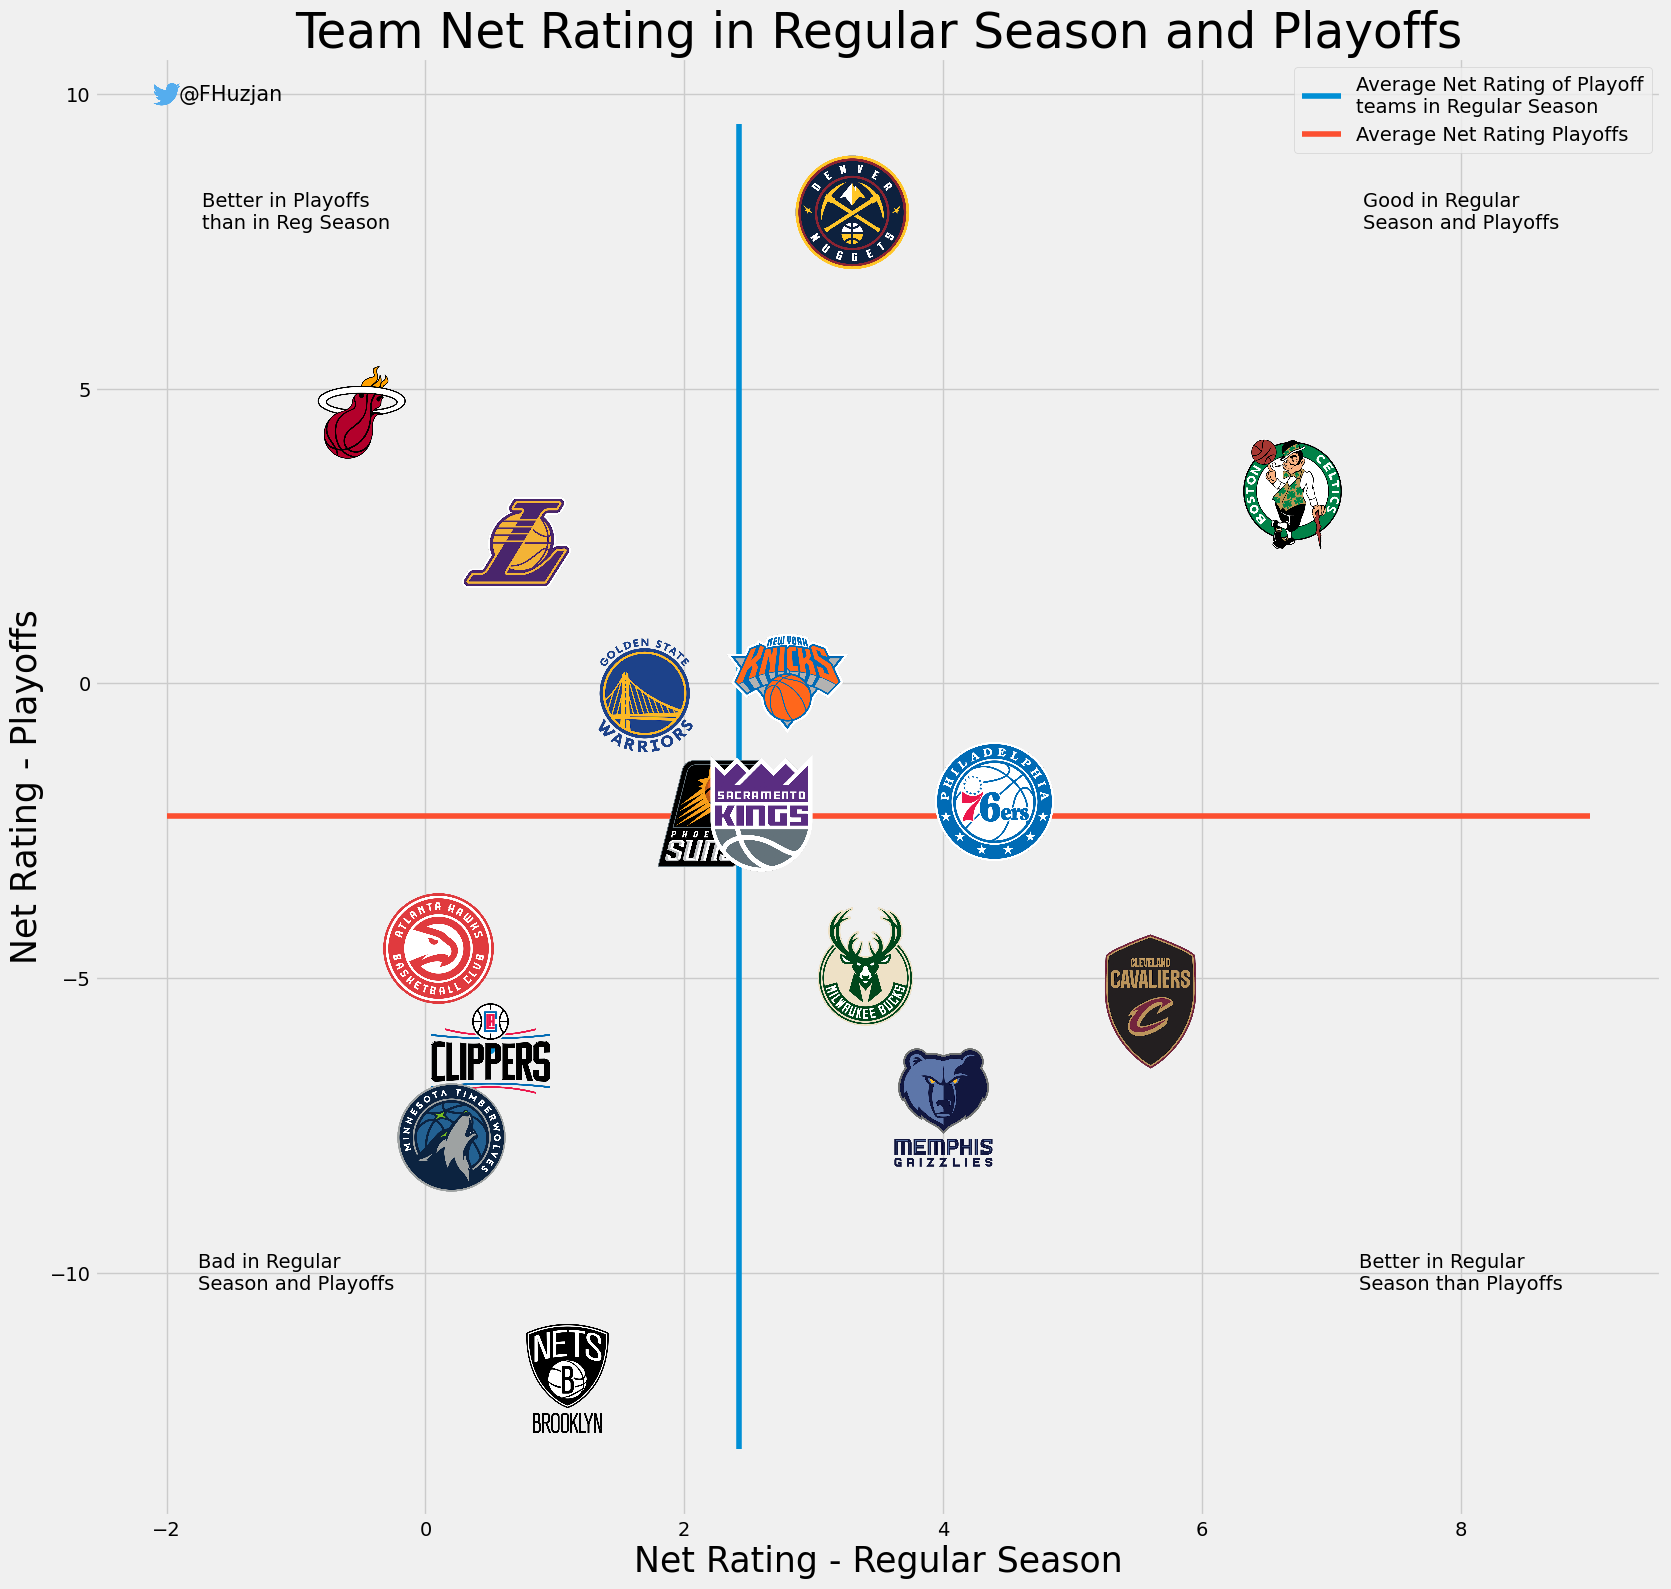

In [157]:
fig, ax = plt.subplots(figsize=(18, 18))

zoom = 0.125
team_root_dir = 'team_imgs/'

def get_team_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{player_id}.png'), zoom=zoom)

for i in range(len(teams_regular)):
    regular_item = teams_regular.iloc[i]
    playoff_item = teams_playoff.iloc[i]
    
    id_ = regular_item['TEAM_ID']
    
    ax.scatter(regular_item['NET_RATING'], playoff_item['NET_RATING'])
    
    ab = AnnotationBbox(get_team_img(id_), (regular_item['NET_RATING'], playoff_item['NET_RATING']), frameon=False)
    ax.add_artist(ab)


avg_reg = teams_regular['NET_RATING'].mean()
# avg_reg = 0.02
avg_po = teams_playoff['NET_RATING'].mean()

print(avg_reg)
print(avg_po)


ax.plot([avg_reg, avg_reg], [-13, 9.5], label='Average Net Rating of Playoff\nteams in Regular Season')
ax.plot([-2, 9], [avg_po, avg_po], label='Average Net Rating Playoffs')

ab = AnnotationBbox(TextArea('Good in Regular\nSeason and Playoffs'), (8, 8), frameon=False)
ax.add_artist(ab)

ab = AnnotationBbox(TextArea('Better in Playoffs\nthan in Reg Season'), (-1, 8), frameon=False)
ax.add_artist(ab)

ab = AnnotationBbox(TextArea('Bad in Regular\nSeason and Playoffs'), (-1, -10), frameon=False)
ax.add_artist(ab)

ab = AnnotationBbox(TextArea('Better in Regular\nSeason than Playoffs'), (8, -10), frameon=False)
ax.add_artist(ab)

ax.set_xlabel("Net Rating - Regular Season", fontsize=25)
ax.set_ylabel("Net Rating - Playoffs", fontsize=25)
ax.set_title("Team Net Rating in Regular Season and Playoffs", fontdict={'fontsize': 35})
ab = AnnotationBbox(OffsetImage(plt.imread(f'twitter_logo (1).png'), zoom=0.1), (-2, 10), frameon=False)
ax.add_artist(ab)
ax.text(x=-1.1, y=9.9, ha='right', s='@FHuzjan', size=15)
plt.legend()

plt.savefig('Graphs/net_rtg_reg_po.png', bbox_inches='tight')

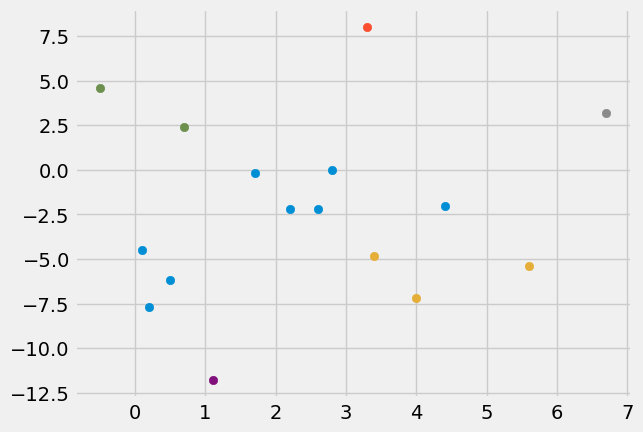

In [192]:
regular_net = np.array(teams_regular['NET_RATING'])
playoff_net = np.array(teams_playoff['NET_RATING'])

X = np.vstack((regular_net, playoff_net)).T

kmeans = KMeans(n_clusters=7, n_init="auto").fit(X)

labels = kmeans.labels_

x_with_labels = np.vstack((regular_net, playoff_net, labels)).T

for g in np.unique(labels):
    i = np.where(labels == g)
    plt.scatter(regular_net[i], playoff_net[i], label=g)
    
    
# plt.legend()
# plt.savefig('off_def_rtg_groups.png')

In [196]:
a


{(1, 2): 'a'}

In [193]:
5 // 2

2

/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Text(0.5, 1.0, 'Elbow curve')

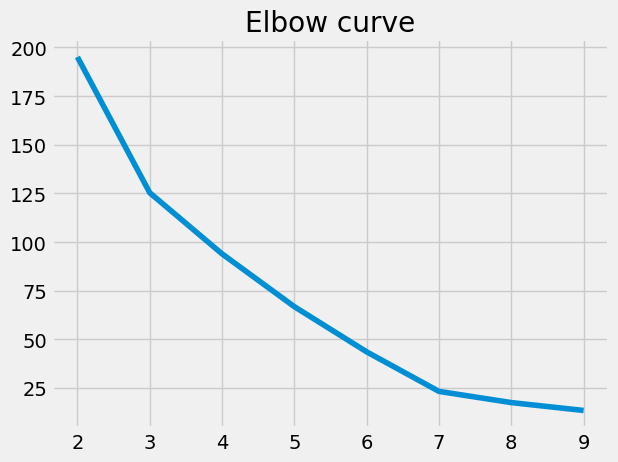

In [120]:
distorsions = []
max_number_of_clusters = 10

for k in range(2, max_number_of_clusters):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# fig = plt.figure(figsize=(15, 15))
plt.plot(range(2, max_number_of_clusters), distorsions)
plt.grid(True)
plt.title('Elbow curve')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


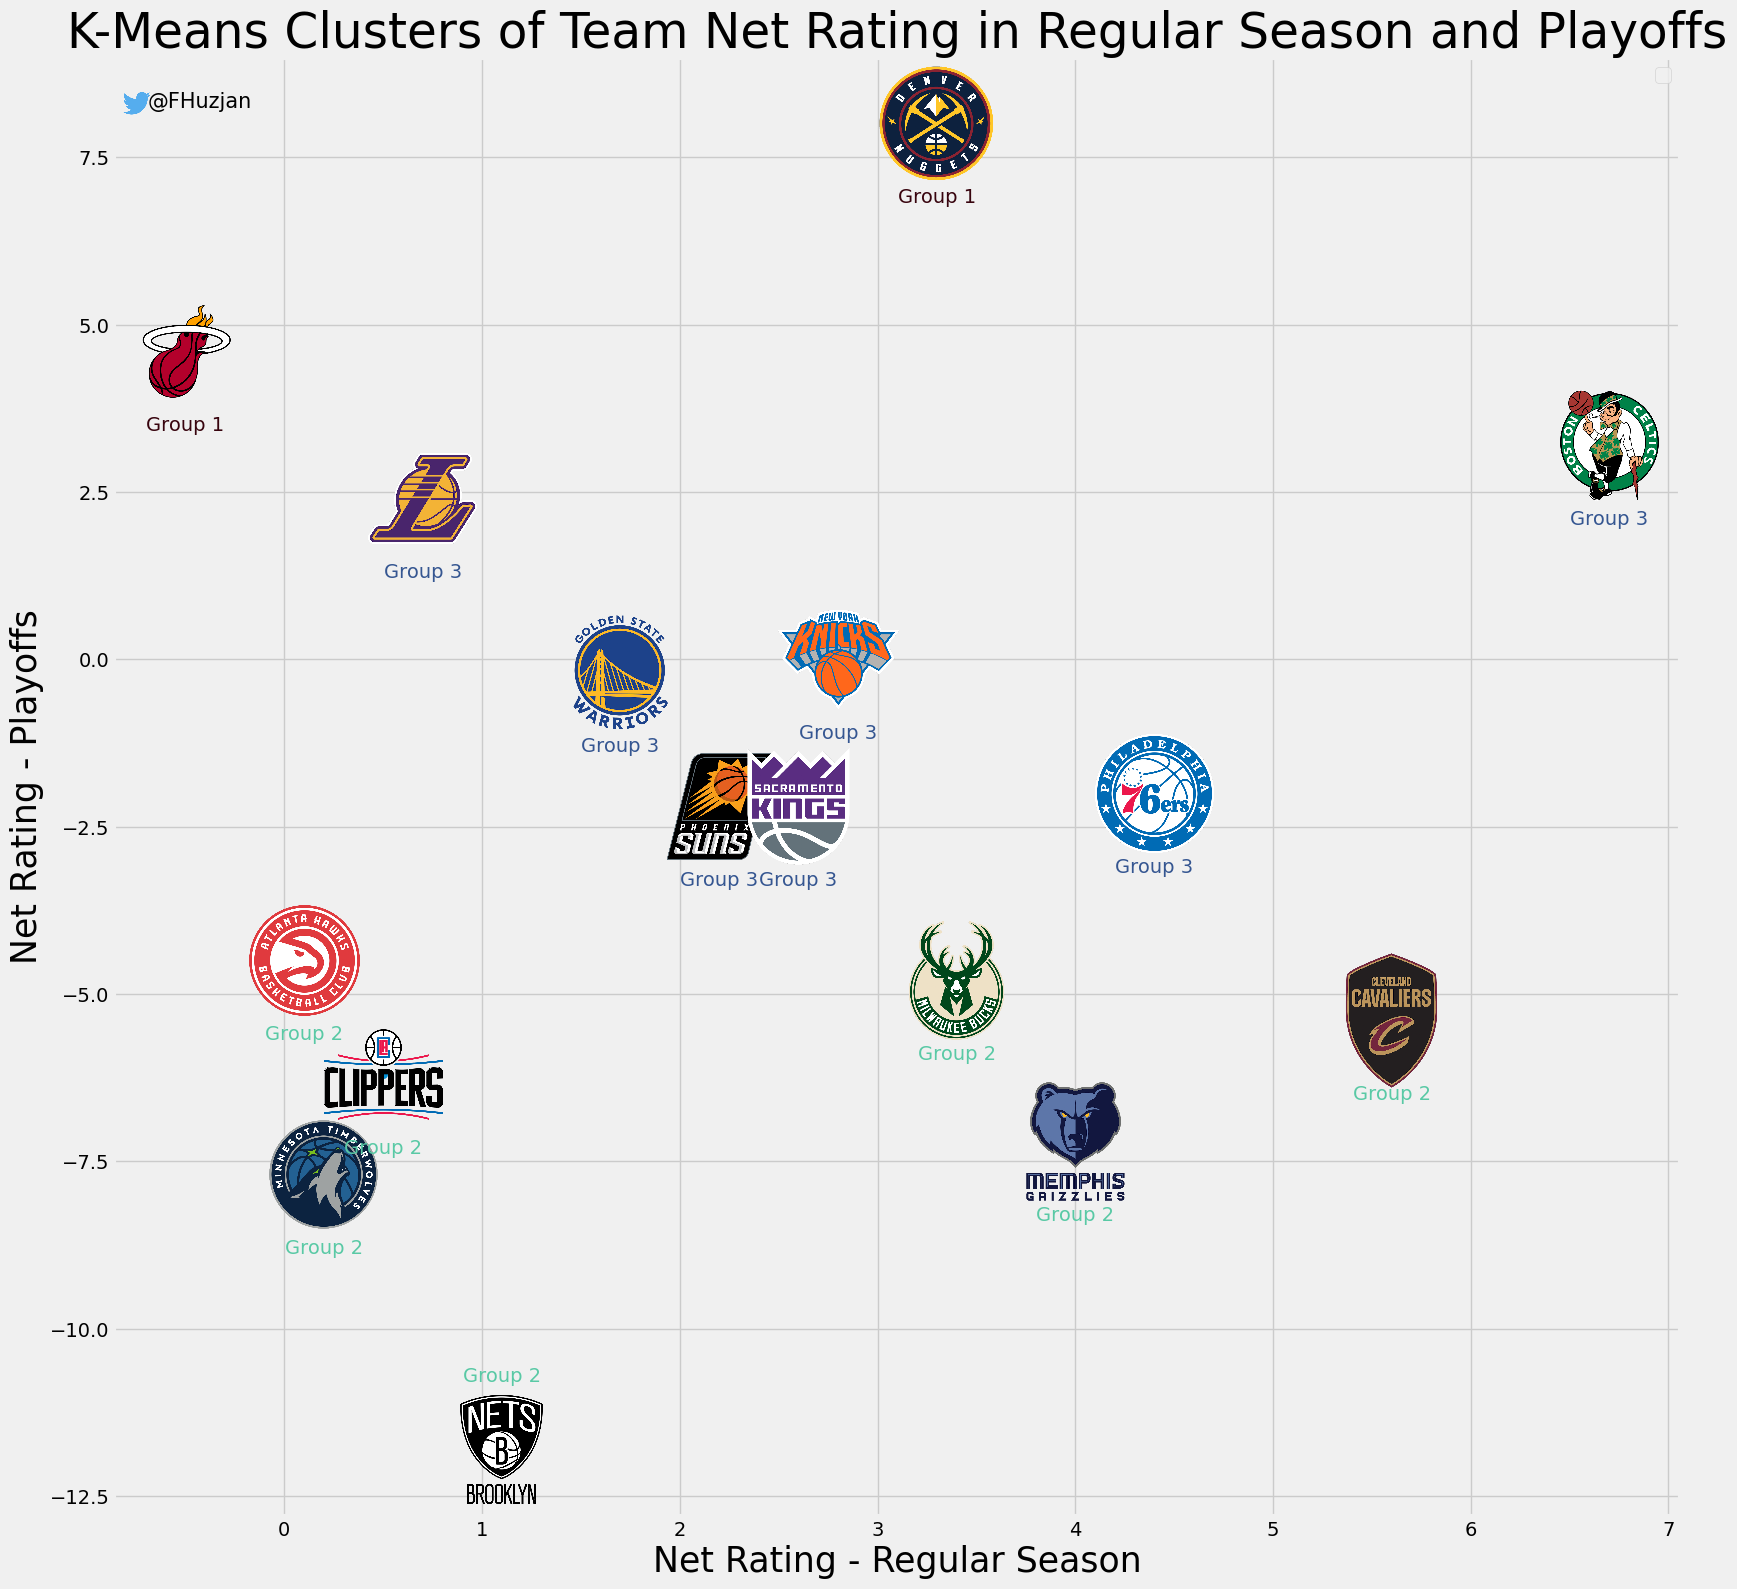

In [158]:
fig, ax = plt.subplots(figsize=(18, 18))

zoom = 0.125
team_root_dir = 'team_imgs/'

def get_team_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{player_id}.png'), zoom=zoom)

for i in range(len(teams_regular)):
    regular_item = teams_regular.iloc[i]
    playoff_item = teams_playoff.iloc[i]
    
    id_ = regular_item['TEAM_ID']
    
    ax.scatter(regular_item['NET_RATING'], playoff_item['NET_RATING'])
    
    ab = AnnotationBbox(get_team_img(id_), (regular_item['NET_RATING'], playoff_item['NET_RATING']), frameon=False)
    ax.add_artist(ab)

dx = 0
dy = -1.1

for x, y, i in x_with_labels:
    # i = np.where(labels == g)
    
    if i == 0:
        color = '#38040E'
    elif i == 1:
        color = '#59C9A5'
    else:
        color = '#355691'
        
    if x == 1.1 and y == -11.8:
        ab = AnnotationBbox(TextArea(f'Group {int(i)+1}', textprops=dict(color=color)), (x + dx, y - dy), frameon=False)
        ax.add_artist(ab)
    
    else:
        ab = AnnotationBbox(TextArea(f'Group {int(i)+1}', textprops=dict(color=color)), (x + dx, y + dy), frameon=False)
        ax.add_artist(ab)
    # ax.scatter(regular_net[i], playoff_net[i], label=g)
    
ax.set_xlabel("Net Rating - Regular Season", fontsize=25)
ax.set_ylabel("Net Rating - Playoffs", fontsize=25)
ax.set_title("K-Means Clusters of Team Net Rating in Regular Season and Playoffs", fontdict={'fontsize': 35})
ab = AnnotationBbox(OffsetImage(plt.imread(f'twitter_logo (1).png'), zoom=0.1), (-0.75, 8.3), frameon=False)
ax.add_artist(ab)
ax.text(x=-0.165, y=8.25, ha='right', s='@FHuzjan', size=15)
plt.legend()

plt.savefig('Graphs/k_means_net_rtg_reg_po.png', bbox_inches='tight')

In [139]:
print(x_with_labels)

[[  0.1  -4.5   1. ]
 [  6.7   3.2   2. ]
 [  1.1 -11.8   1. ]
 [  5.6  -5.4   1. ]
 [  3.3   8.    0. ]
 [  1.7  -0.2   2. ]
 [  0.5  -6.2   1. ]
 [  0.7   2.4   2. ]
 [  4.   -7.2   1. ]
 [ -0.5   4.6   0. ]
 [  3.4  -4.8   1. ]
 [  0.2  -7.7   1. ]
 [  2.8   0.    2. ]
 [  4.4  -2.    2. ]
 [  2.2  -2.2   2. ]
 [  2.6  -2.2   2. ]]
